In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
tf.__version__

'2.3.0'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
hotel_review = pd.read_csv('/content/drive/My Drive/data/Hotel_Reviews.csv')

In [ ]:
hotel_review.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [ ]:
hotel_review.shape

(515738, 17)

In [ ]:
positive_review = hotel_review.loc[:,['Positive_Review']]
negative_review = hotel_review.loc[:,['Negative_Review']]

In [ ]:
options = ['No Positive', 'No Negative']
selected_positive_review = positive_review.loc[~(positive_review['Positive_Review'] == "No Positive"), :]
selected_negative_review = negative_review.loc[~(negative_review['Negative_Review'] == "No Negative"), :]
selected_positive_review['is_positive'] = 1
selected_positive_review.columns = ['review', 'is_positive']
selected_positive_review.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,review,is_positive
0,Only the park outside of the hotel was beauti...,1
1,No real complaints the hotel was great great ...,1
2,Location was good and staff were ok It is cut...,1
3,Great location in nice surroundings the bar a...,1
4,Amazing location and building Romantic setting,1


In [ ]:
selected_negative_review['is_postive'] = 0
selected_negative_review.columns = ['review', 'is_positive']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
selected_positive_review = selected_positive_review[:30000]
selected_negative_review = selected_negative_review[:30000]

In [ ]:
print(selected_negative_review.shape)
print(selected_positive_review.shape)


(30000, 2)
(30000, 2)


In [ ]:
reviews = selected_positive_review.append(selected_negative_review)

In [ ]:
reviews.head(n=10)

,review,is_positive
0,Only the park outside of the hotel was beauti...,1
1,No real complaints the hotel was great great ...,1
2,Location was good and staff were ok It is cut...,1
3,Great location in nice surroundings the bar a...,1
4,Amazing location and building Romantic setting,1
5,Good restaurant with modern design great chil...,1
6,The room is spacious and bright The hotel is ...,1
7,Good location Set in a lovely park friendly s...,1
9,The room was big enough and the bed is good T...,1
10,Rooms were stunningly decorated and really sp...,1


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


# New section

In [ ]:
def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

In [ ]:
# clean text data
reviews["review"] = reviews["review"].apply(lambda x: clean_text(x))

In [ ]:
reviews_text = reviews['review'].tolist()
labels = reviews['is_positive'].tolist()

enc = LabelEncoder()
encoded_labels = enc.fit_transform(labels)


#TOKENIZE
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from keras.preprocessing.text import Tokenizer
import nltk
nltk.download('punkt')
complete_reviews=[] 
for review in reviews['review']:
  for sent in sent_tokenize(review):
    complete_reviews.append(sent)
print('complete_reviews done') 
final_corpus = [sentence for sentence in complete_reviews if sentence.strip() !='']
print('final corpus done')
word_punctuation_tokenizer = nltk.WordPunctTokenizer()
word_tokenized_corpus = [word_punctuation_tokenizer.tokenize(sent) for sent in final_corpus]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
complete_reviews done
final corpus done


In [ ]:
# model parameters
vocab_size = 28593
embedding_dim = 128
max_length = 128
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_portion=0.7

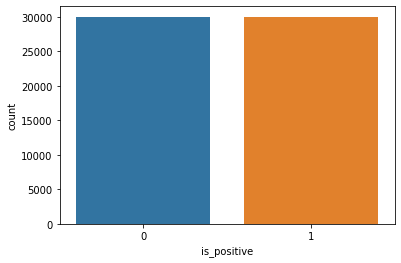

In [ ]:
import seaborn as sns
sns.countplot(x="is_positive",data=reviews)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# splitting dataset using stratified sampling
x_train, x_val, y_train, y_val = train_test_split(reviews.review, 
                                                  reviews.is_positive, 
                                                  test_size=0.30, 
                                                  random_state=17,
                                                  stratify=reviews.is_positive.values
                                               )

In [ ]:
import pandas as pd
data_train = pd.DataFrame()
data_test  = pd.DataFrame()
data_train['label'] = y_train
data_train['text'] = x_train
data_test['label'] = y_val
data_test['text'] = x_val

In [ ]:
train_sentences = data_train['text'].tolist()
train_labels = data_train['label'].tolist()
test_sentences = data_test['text'].tolist()
test_labels = data_test['label'].tolist()
data_train.groupby(['label']).count()

,text
label,
0,21000
1,21000


In [ ]:
#Ratio of +ve and -ve reviews in training dataset
ratio = str(data_train['label'].value_counts()[0]/data_train['label'].value_counts()[1])
print("ratio of +ve to -ve dataEntry- "+ratio+":1")

ratio of +ve to -ve dataEntry- 1.0:1


In [ ]:
y_train.head(n=10)

15393    0
12330    1
18976    0
26737    1
31241    1
33259    0
10836    0
30247    0
4817     0
15889    0
Name: is_positive, dtype: int64

In [ ]:
!pip install bert-for-tf2

     |████████████████████████████████| 51kB 2.3MB/s 
  Created wheel for bert-for-tf2: filename=bert_for_tf2-0.14.7-cp36-none-any.whl size=30539 sha256=a0c1f1056776aaed05799d468c27b93602d984e574e0c3be1266d123c76a8b1a
  Stored in directory: /root/.cache/pip/wheels/e1/f8/e2/b98f79a6b8cc898d8e4102b83acb8a098df7d27500a2bac912
  Created wheel for py-params: filename=py_params-0.9.7-cp36-none-any.whl size=7304 sha256=8784c6a707549141a6bdbfd275886bb65a2c938f8b33aa592583970998679315
  Stored in directory: /root/.cache/pip/wheels/67/f5/19/b461849a50aefdf4bab47c4756596e82ee2118b8278e5a1980
  Created wheel for params-flow: filename=params_flow-0.8.2-cp36-none-any.whl size=19475 sha256=c5f9027ba51e7f57f1a61fd4bd4c27147c7a57b69d4adbea7c959ddfbd4c9e3b
  Stored in directory: /root/.cache/pip/wheels/08/c8/7f/81c86b9ff2b86e2c477e3914175be03e679e596067dc630c06
Successfully built bert-for-tf2 py-params params-flow


In [ ]:
!pip install sentencepiece

     |████████████████████████████████| 1.1MB 3.4MB/s 


In [ ]:
import bert
!pip install "tensorflow_hub>=0.6.0"
import tensorflow_hub as hub

In [ ]:
BertTokenizer = bert.bert_tokenization.FullTokenizer

In [ ]:
model_url = "https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/1"
bert_layer = hub.KerasLayer(model_url, trainable=False)
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()

In [ ]:
to_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = BertTokenizer(vocab_file, to_lower_case)

In [ ]:
tokenizer.tokenize("This hotel is sooo nice")
print(len(tokenizer.vocab))

28996


In [ ]:
def tokenize_reviews(text_review):
    return tokenizer.convert_tokens_to_ids(tokenizer.tokenize(text_review))

In [ ]:
tokenized_review = [tokenize_reviews(review) for review in reviews_text]

In [ ]:
vocab_size = len(tokenizer.vocab) + 1
embedding_dim = 128
max_length = 128
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_portion=0.7

In [ ]:
train_tokens = list(map(lambda t: ['[CLS]'] + tokenizer.tokenize(t)[:127], train_sentences))
test_tokens = list(map(lambda t: ['[CLS]'] + tokenizer.tokenize(t)[:127], test_sentences))

In [ ]:
train_tokens_ids = list(map(tokenizer.convert_tokens_to_ids, train_tokens))

In [ ]:
test_tokens_ids = list(map(tokenizer.convert_tokens_to_ids, test_tokens))

In [ ]:
train_padded = tf.keras.preprocessing.sequence.pad_sequences(train_tokens_ids, maxlen=128, truncating="post", padding="post", dtype="int")
test_padded = tf.keras.preprocessing.sequence.pad_sequences(test_tokens_ids, maxlen=128, truncating="post", padding="post", dtype="int")

In [ ]:
train_padded = np.array(train_padded)
train_labels = np.array(train_labels)
test_padded = np.array(test_padded)
test_labels = np.array(test_labels)

In [ ]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.merge import concatenate
from keras.utils.vis_utils import plot_model

In [ ]:
print(len(train_labels))

42000


In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
  tf.keras.layers.Conv1D(128, 5, activation='relu'),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
  tf.keras.layers.Dense(24, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid' )
])

#compile model
model.compile(loss="binary_crossentropy",
             optimizer="adam",
             metrics=['accuracy'])
#model.build(input_shape=[len(train_padded),512,128])

model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 128, 128)          3711616   
_________________________________________________________________
conv1d_20 (Conv1D)           (None, 124, 128)          82048     
_________________________________________________________________
bidirectional_18 (Bidirectio (None, 64)                41216     
_________________________________________________________________
dense_38 (Dense)             (None, 24)                1560      
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 25        
Total params: 3,836,465
Trainable params: 3,836,465
Non-trainable params: 0
_________________________________________________________________


In [ ]:
length = 128
vocab_size = len(tokenizer.vocab) + 1

In [ ]:
history = model.fit(train_padded, train_labels, verbose=1, epochs=10, validation_data=(test_padded, test_labels))

Epoch 1/10
1313/1313 [==============================] - 252s 192ms/step - loss: 0.2180 - accuracy: 0.9163 - val_loss: 0.1937 - val_accuracy: 0.9300
Epoch 2/10
1313/1313 [==============================] - 249s 190ms/step - loss: 0.1565 - accuracy: 0.9443 - val_loss: 0.1902 - val_accuracy: 0.9285
Epoch 3/10
1313/1313 [==============================] - 248s 189ms/step - loss: 0.1279 - accuracy: 0.9552 - val_loss: 0.2083 - val_accuracy: 0.9261
Epoch 4/10
1313/1313 [==============================] - 249s 190ms/step - loss: 0.1089 - accuracy: 0.9624 - val_loss: 0.2308 - val_accuracy: 0.9258
Epoch 5/10
1313/1313 [==============================] - 247s 188ms/step - loss: 0.0909 - accuracy: 0.9691 - val_loss: 0.2469 - val_accuracy: 0.9229
Epoch 6/10
1313/1313 [==============================] - 245s 187ms/step - loss: 0.0765 - accuracy: 0.9738 - val_loss: 0.2693 - val_accuracy: 0.9238
Epoch 7/10
1313/1313 [==============================] - 248s 189ms/step - loss: 0.0702 - accuracy: 0.9758 - val_

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix,accuracy_score
print("F1-score: {0}".format(f1_score(x_pred, y_pred)))
print("Precision: ",precision_score(y_pred, y_pred))
print("Recall: ",recall_score(y_pred, y_pred))
print("Accuracy: ",accuracy_score(y_pred,y_pred))
print("Confusion matrix: ")
confusion_matrix(y_pred, y_pred)

SyntaxError: ignored

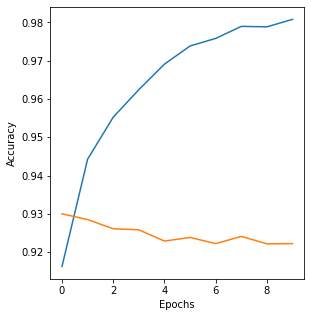

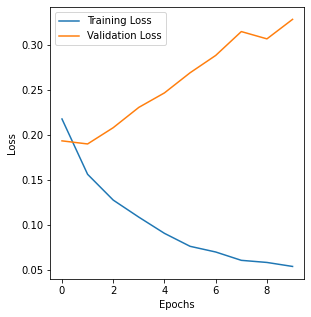

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.legend()
plt.show()